# Bibliotecas

In [1]:
from madeiras import *
import pandas as pd
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams.update({
                        'font.family': 'serif',
                        'mathtext.fontset': 'cm',
                        'axes.unicode_minus': False
                    })

# Teste da função objetivo

### _Upload_ dos dados de projetos

In [3]:
df = pd.read_excel("beam_data_02.xlsx")
df = df.to_dict(orient="records")
df = df[0]
df

{'l (cm)': 400,
 'b_wpista (cm)': 900,
 'tipo_secao_longarina': 'Circular',
 'tipo_secao_tabuleiro': 'Retangular',
 'p_gk (kPa)': 1,
 'p_rodak (kN)': 75,
 'p_qk (kPa)': 5,
 'a (m)': 1.5,
 'classe_carregamento': 'permanente',
 'classe_madeira': 'madeira natural',
 'classe_umidade': 1,
 'gamma_g': 1.35,
 'gamma_q': 1.5,
 'gamma_wf': 1.4,
 'gamma_wc': 1.8,
 'psi_2': 0.3,
 'phi': 0.6,
 'densidade longarina (kg/m³)': 420,
 'resistência característica à flexão longarina (MPa)': 40,
 'resistência característica ao cisalhamento longarina (MPa)': 4,
 'módulo de elasticidade à flexão longarina (GPa)': 14,
 'densidade tabuleiro (kg/m³)': 420,
 'resistência característica à flexão tabuleiro (MPa)': 40}

### Dados dos intervalos das vars de projeto

Carregando aqui pois é um valor esperado pela classe `ProjetoOtimo`

In [4]:
ds    = [30, 150]
esps  = [30, 200]
bws   = [5, 60]
hs    = [5, 60]

### Solução desejada

In [7]:
d   = 60
esp = 120
bw  = 10
h   = 30

### Instância de uma viga

In [8]:
df_teste_proj = df.copy()
viga = ProjetoOtimo(
                        l=df_teste_proj["l (cm)"],
                        p_gk=df_teste_proj["p_gk (kPa)"],
                        p_rodak=df_teste_proj["p_rodak (kN)"],
                        p_qk=df_teste_proj ["p_qk (kPa)"],
                        a=df_teste_proj ["a (m)"],
                        classe_carregamento=df_teste_proj["classe_carregamento"],
                        classe_madeira=df_teste_proj["classe_madeira"],
                        classe_umidade=df_teste_proj["classe_umidade"],
                        gamma_g=df_teste_proj["gamma_g"],
                        gamma_q=df_teste_proj["gamma_q"],
                        gamma_wc=df_teste_proj["gamma_wc"],
                        gamma_wf=df_teste_proj["gamma_wf"],
                        psi2=df_teste_proj["psi_2"],
                        phi=df_teste_proj["phi"],
                        densidade_long=df_teste_proj["densidade longarina (kg/m³)"],
                        densidade_tab=df_teste_proj["densidade tabuleiro (kg/m³)"],
                        f_mk_long=df_teste_proj["resistência característica à flexão longarina (MPa)"],
                        f_vk_long=df_teste_proj["resistência característica ao cisalhamento longarina (MPa)"],
                        e_modflex_long=df_teste_proj["módulo de elasticidade à flexão longarina (GPa)"],
                        f_mk_tab=df_teste_proj["resistência característica à flexão tabuleiro (MPa)"],
                        d_min=ds[0],
                        d_max=ds[1],
                        esp_min=esps[0],
                        esp_max=esps[1],
                        bw_min=bws[0],
                        bw_max=bws[1],
                        h_min=hs[0],
                        h_max=hs[1],
                  )

### Avaliação do método evaluate

somente para conferência do funcionamento

In [10]:
x_manual = np.array([[d, esp, bw, h]])                      # d, esp, bw, h
out = viga.evaluate(x_manual, return_values_of=["F", "G"])  # Avaliação da viga
f = out[0]
g = out[1]
print(f, g)

[[ 0.31274334 -0.06742151]] [[-0.38536338 -0.46137978 -0.82474009  0.03775761]]


### Avaliação do método para cálculo das restrições

Permite ver todas as saídas do vigaa

In [11]:
out = viga.calcular_objetivos_restricoes_otimizacao(d, esp, bw, h)
out

([0.31274333882308136, -0.06742151243651033],
 [-0.38536337922910247,
  -0.46137978244197325,
  -0.8247400924285676,
  0.037757607950000424],
 {'m_sd [kN.m]': 223.43709898247099,
  'k_mod1': 0.6,
  'k_mod2': 1.0,
  'k_mod': 0.6,
  'sigma_x [kPa]': 10536.627784643957,
  'f_md [kPa]': 17142.85714285714,
  'g_otimiz [-]': -0.38536337922910247,
  'g_confia [kPa]': 6606.229358213184,
  'analise': 'OK'},
 {'v_sd [kN]': 152.29127866997098,
  'f_vd [kPa]': 1333.3333333333333,
  'tau_sd [kPa]': 718.1602900773689,
  'g_otimiz [-]': -0.46137978244197325,
  'g_confia [kPa]': 615.1730432559643,
  'analise': 'OK'},
 {'delta_lim_total [m]': 0.016,
  'delta_lim_variavel [m]': 0.011111111111111112,
  'delta_fluencia [m]': 0.0010787441989841653,
  'delta_qk [m]': 0.0019473323063492489,
  'g_otimiz [-]': -0.8247400924285676,
  'g_confia [m]': 0.014921255801015835,
  'of [-]': 0.06742151243651033,
  'analise': 'OK'},
 {'area [m2]': 0.2827433388230814,
  'w_x [m3]': 0.021205750411731103,
  'i_x [m4]': 0.00

In [12]:
out[0]

[0.31274333882308136, -0.06742151243651033]

In [13]:
out[1]

[-0.38536337922910247,
 -0.46137978244197325,
 -0.8247400924285676,
 0.037757607950000424]

# Execução da otimização

### Chamando o NSGA-II

In [14]:
res_nsga = chamando_nsga2(df.copy(), ds, esps, bws, hs)
res_nsga

,d [cm],esp [cm],bw [cm],h [cm],area [m²],delta [-],flex lim beam [(Ms-Mr)/Mr],cis lim beam [(Vs-Vr)/Vr],delta lim beam [(ps-pr)/pr],flex lim deck [(Ms-Mr)/Mr]
0,51.814743,199.807986,5.378022,59.992617,0.243125,0.137869,-3.570607e-07,-0.147363,-0.684881,-0.003770
1,50.461583,30.153309,5.000000,5.000015,0.202492,0.122320,-5.688447e-06,-0.176443,-0.649697,-11.330725
2,51.773997,193.250086,5.224265,59.638882,0.241687,0.137218,-6.107573e-04,-0.148921,-0.683888,-0.006333
3,51.748297,190.255569,5.027467,59.999997,0.240485,0.137169,-1.824725e-06,-0.148801,-0.683260,-0.000530
4,51.772288,194.468333,5.240809,59.638882,0.241771,0.137414,-2.555612e-05,-0.148309,-0.683846,-0.001314
...,...,...,...,...,...,...,...,...,...,...
495,51.436272,158.439726,5.000000,53.214002,0.234399,0.133780,-6.068180e-05,-0.155598,-0.675504,-0.002613
496,50.565062,53.048314,5.000001,14.605611,0.208115,0.123592,-5.897464e-05,-0.174291,-0.652556,-0.061002
497,51.031430,113.933208,5.000000,41.427385,0.225248,0.129192,-6.692121e-05,-0.164311,-0.665083,-0.000458
498,50.537650,49.154476,5.000000,11.314014,0.206252,0.123256,-4.588020e-05,-0.174862,-0.651801,-0.191679


### Tabela de resultados da fronteira

In [15]:
print(
            res_nsga.to_latex(
            column_format=''.join(['c' for _ in range(len(res_nsga.columns) + 1)]),
            float_format="%.3f",
            escape=False,
            caption='Tensões para diferentes combinações de carga',
            label='tab:tensoes_completas',
            position='htbp'
            )
    )

\begin{table}[htbp]
\caption{Tensões para diferentes combinações de carga}
\label{tab:tensoes_completas}
\begin{tabular}{ccccccccccc}
\toprule
 & d [cm] & esp [cm] & bw [cm] & h [cm] & area [m²] & delta [-] & flex lim beam [(Ms-Mr)/Mr] & cis lim beam [(Vs-Vr)/Vr] & delta lim beam [(ps-pr)/pr] & flex lim deck [(Ms-Mr)/Mr] \\
\midrule
0 & 51.815 & 199.808 & 5.378 & 59.993 & 0.243 & 0.138 & -0.000 & -0.147 & -0.685 & -0.004 \\
1 & 50.462 & 30.153 & 5.000 & 5.000 & 0.202 & 0.122 & -0.000 & -0.176 & -0.650 & -11.331 \\
2 & 51.774 & 193.250 & 5.224 & 59.639 & 0.242 & 0.137 & -0.001 & -0.149 & -0.684 & -0.006 \\
3 & 51.748 & 190.256 & 5.027 & 60.000 & 0.240 & 0.137 & -0.000 & -0.149 & -0.683 & -0.001 \\
4 & 51.772 & 194.468 & 5.241 & 59.639 & 0.242 & 0.137 & -0.000 & -0.148 & -0.684 & -0.001 \\
5 & 51.006 & 110.940 & 5.000 & 40.596 & 0.225 & 0.129 & -0.000 & -0.165 & -0.664 & -0.004 \\
6 & 51.805 & 198.271 & 5.330 & 59.880 & 0.243 & 0.138 & -0.000 & -0.148 & -0.685 & -0.001 \\
7 & 51.021 & 11

### Visualização da fronteira

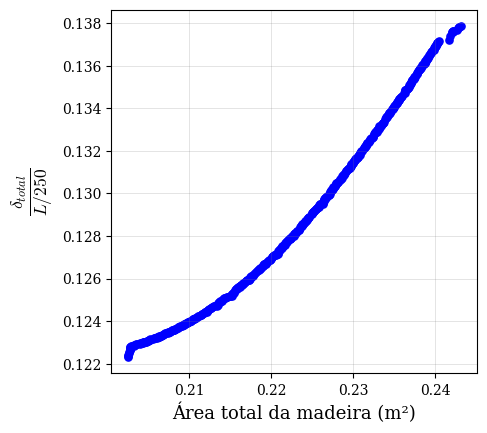

In [ ]:
### Figure name and DPI
dpi = 600                                                   # Change as you wish
name = 'fronteira_eficiente'                                # Change as you wish

### Chart dimensions (in centimeters)
b_cm = 12                                                   # Change as you wish
h_cm = 12                                                   # Change as you wish
inches_to_cm = 1 / 2.54
b_input = b_cm * inches_to_cm
h_input = h_cm * inches_to_cm

### Axis and labels (For LateX font format use the dollar sign $)
label_x = 'Área total de madeira (m²)'                       # Change as you wish
label_y = r"$\frac{\delta_{total}}{L/250}$"            # Change as you wish
size_label = 13                                              # Change as you wish
color_label = 'black'                                         # or hexadecimal. Change as you wish
size_axis = 10                                               # Change as you wish
color_axis = 'black'                                           # or hexadecimal. Change as you wish

### Scatter
alpha_scatter = 1.0                                             # Change as you wish
color_scatter = 'blue'                                          # Change as you wish
size_scatter = 27                                               # Change as you wish

### Grid
on_or_off = True
line_width_grid = 0.5                                       # Change as you wish
alpha_grid = 0.3                                            # Change as you wish
style_grid = '-'                                            # Change as you wish
color_grid = 'gray'                                         # or hexadecimal. Change as you wish

### Figure
fig, ax = plt.subplots(figsize=(b_input, h_input))
ax.tick_params(axis='both', which='major', labelsize=size_axis, colors=color_axis)
ax.set_xlabel(label_x, fontsize=size_label, color=color_label)
ax.set_ylabel(label_y, fontsize=18, color=color_label)

### Title. Do you need a title? Use the cell bellow:
# ax.set_title('Sine Wave Plot', fontsize=16)

### Config grid
plt.grid(on_or_off, which='both', linestyle=style_grid, linewidth=line_width_grid, color=color_grid, alpha=alpha_grid)

### Plot data
ax.scatter(res_nsga["area [m²]"].to_list(), res_nsga["delta [-]"].to_list(), alpha=alpha_scatter, color=color_scatter, s=size_scatter)

### Save. Do you need save? Use the cell bellow:
fig.savefig(f'z_{name}.png', dpi=dpi, bbox_inches='tight')
plt.show()

# Monte Carlo

Total amostras: 25000
Viáveis: 16021


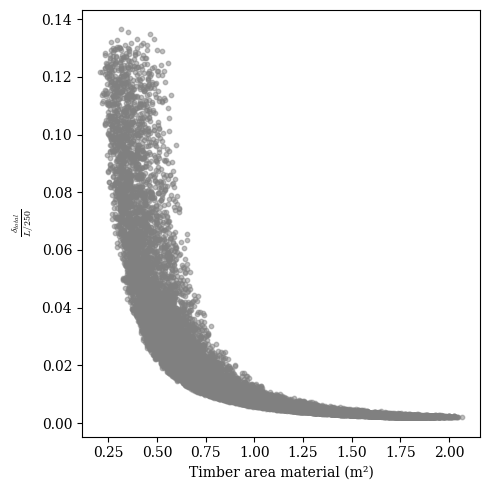

In [18]:
N = 25000
rng = np.random.default_rng(123)

# amostra uniformemente no intervalo do vigaa
d_mc = rng.uniform(viga.xl[0], viga.xu[0], size=N)
X_mc = d_mc.reshape(-1, 1)   # shape (N,1)
esp_mc = rng.uniform(viga.xl[1], viga.xu[1], size=N)
bw_mc = rng.uniform(viga.xl[2], viga.xu[2], size=N)
h_mc = rng.uniform(viga.xl[3], viga.xu[3], size=N)
X_mc = np.column_stack((d_mc, esp_mc, bw_mc,  h_mc))  # shape (N,4)

# avalia em lote
out = viga.evaluate(X_mc, return_values_of=["F", "G"])
F = np.asarray(out[0])   # shape (N,2)
G = np.asarray(out[1])   # shape (N,4)

# filtro de viabilidade: todas restrições <= 0
mask_feas = np.all(G <= 0.0, axis=1)

F_feas = F[mask_feas]
G_feas = G[mask_feas]
X_feas = X_mc[mask_feas]

print("Total amostras:", N)
print("Viáveis:", int(mask_feas.sum()))

# ---------------------------
# Scatter plot (f1 vs f2)
# ---------------------------
# Se seu f2 = -delta, converta para delta positivo no plot:
F_plot = F_feas.copy()
F_plot[:, 1] = -F_plot[:, 1]

plt.rc('font', family='serif')
plt.figure(figsize=(5, 5))
plt.scatter(F_plot[:, 0], F_plot[:, 1], s=10, color='gray', alpha=0.5, label="Feasible Samples")
plt.xlabel(r"Timber area material (m²)")
plt.ylabel(r"$\frac{\delta_{total}}{L/250}$")
plt.tight_layout()
plt.show()

# Unindo as duas soluções (OTM + MC)

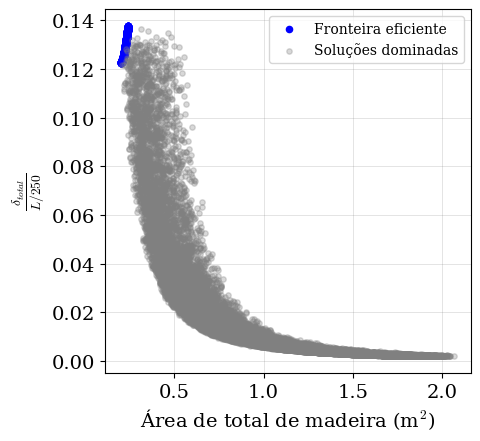

In [21]:
# =========================================================
# Figure name and DPI
# =========================================================
dpi = 600
name = 'pareto_front_area_vs_displacement'

# =========================================================
# Chart dimensions (in centimeters)
# =========================================================
b_cm = 12
h_cm = 12
inches_to_cm = 1 / 2.54
b_input = b_cm * inches_to_cm
h_input = h_cm * inches_to_cm

# =========================================================
# Axis labels
# =========================================================
label_x = r"Área de total de madeira (m$^2$)"
label_y = r"$\frac{\delta_{total}}{L/250}$"
size_label = 14
color_label = 'black'

# =========================================================
# Axis ticks
# =========================================================
size_axis = 14
color_axis = 'black'

# =========================================================
# Scatter – Efficient frontier
# =========================================================
alpha_front = 1.0
color_front = 'blue'
size_front = 20
label_front = "Fronteira eficiente"

# =========================================================
# Scatter – Dominated solutions
# =========================================================
alpha_dom = 0.3
color_dom = 'gray'
size_dom = 15
label_dom = "Soluções dominadas"

# =========================================================
# Legend
# =========================================================
size_legend = 10
location_legend = 'upper right'

# =========================================================
# Grid
# =========================================================
on_or_off = True
line_width_grid = 0.5
alpha_grid = 0.3
style_grid = '-'
color_grid = 'gray'

# =========================================================
# Figure
# =========================================================
fig, ax = plt.subplots(figsize=(b_input, h_input))

ax.tick_params(axis='both', which='major',
               labelsize=size_axis,
               colors=color_axis)

ax.set_xlabel(label_x, fontsize=size_label, color=color_label)
ax.set_ylabel(label_y, fontsize=size_label, color=color_label)

# =========================================================
# Grid
# =========================================================
ax.grid(on_or_off,
        which='both',
        linestyle=style_grid,
        linewidth=line_width_grid,
        color=color_grid,
        alpha=alpha_grid)

# =========================================================
# Plot
# =========================================================
ax.scatter(
    res_nsga["area [m²]"],
    res_nsga["delta [-]"],
    s=size_front,
    color=color_front,
    alpha=alpha_front,
    label=label_front
)

ax.scatter(
    F_plot[:, 0],
    F_plot[:, 1],
    s=size_dom,
    color=color_dom,
    alpha=alpha_dom,
    label=label_dom
)

# =========================================================
# Legend
# =========================================================
ax.legend(fontsize=size_legend, loc=location_legend)

# =========================================================
# Save and show
# =========================================================
fig.savefig(f'z_{name}.png', dpi=dpi, bbox_inches='tight')
plt.show()
